In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Generador congruencial mixto
def gcm(x): # x es la semilla
    a = 16807  # Multiplicador
    c = 18446744073709551603  # Incremento
    m = 2**31-1  # Modulo
    while True:
        x = (a * x + c) % m
        yield x

def media(data):
    sum = 0
    for i in range(len(data)):
        sum += data[i]
    return sum / len(data)

def varianza(data):
    sum = 0
    for i in range(len(data)):
        sum += (data[i]) ** 2
    return (sum / len(data)-1) - (len(data)*media(data)**2/(len(data)-1))

def piedraPapelOTijera(n):
    resultados = []  # Lista vacia
    jugador1 = []  # Lista vacia para guardar los resultados del jugador 1
    jugador2 = []  # Lista vacia para guardar los resultados del jugador 2
    random = gcm(120871089547)  # Generador de numeros aleatorios

    # Genera n resultados aleatorios
    for i in range(n):
        # piedra = 0, papel = 1, tijera = 2
        jugador1.append(next(random) % 3) 
        jugador2.append(next(random) % 3)
        # Guarda el resultado de la partida
        if(jugador1[i] == jugador2[i]):
            resultados.append('Empate')
        elif(jugador1[i] == 0 and jugador2[i] == 1):
            resultados.append('Gana Jugador 2')
        elif(jugador1[i] == 0 and jugador2[i] == 2):
            resultados.append('Gana Jugador 1')
        elif(jugador1[i] == 1 and jugador2[i] == 0):
            resultados.append('Gana Jugador 1')
        elif(jugador1[i] == 1 and jugador2[i] == 2):
            resultados.append('Gana Jugador 2')
        elif(jugador1[i] == 2 and jugador2[i] == 0):
            resultados.append('Gana Jugador 2')
        elif(jugador1[i] == 2 and jugador2[i] == 1):
            resultados.append('Gana Jugador 1')

    # Retorna la lista de resultados
    data = pd.DataFrame(jugador1).rename(columns={0: 'Jugador 1'}).join(pd.DataFrame(jugador2).rename(
        columns={0: 'Jugador 2'}))
    data.index += 1
    data.to_csv('resultadosPPT.csv')

    # Genera una lista del conteo de cada resultado
    dataResultados = pd.DataFrame(resultados).value_counts(
    ).rename_axis('Resultados').reset_index(name='counts')
    display(dataResultados)
    dataResultados.sort_values(by=['Resultados'], inplace=True)

    print("Media: ", media(dataResultados['counts']))
    print("Varianza: ", varianza(dataResultados['counts']))

    # Grafica los resultados en un grafico de barras
    dataResultados.plot(kind='bar', x='Resultados', y='counts',
                        title='Resultados de ' + str(n) + ' juegos de piedra, papel o tijera')
    plt.show()

    # Grafica los resultados en un grafico de pastel
    resultados = pd.Series(resultados).value_counts()
    resultados.plot(
        kind='pie',
        autopct='%1.1f%%',
        colors=['red', 'blue', 'green'],
        title='Resultados de ' + str(n) + ' juegos de piedra, papel o tijera'),
    plt.show()

,Resultados,counts
0,Empate,341
1,Gana Jugador 1,336
2,Gana Jugador 2,323


Media:  333.3333333333333
Varianza:  -55498.999999999956


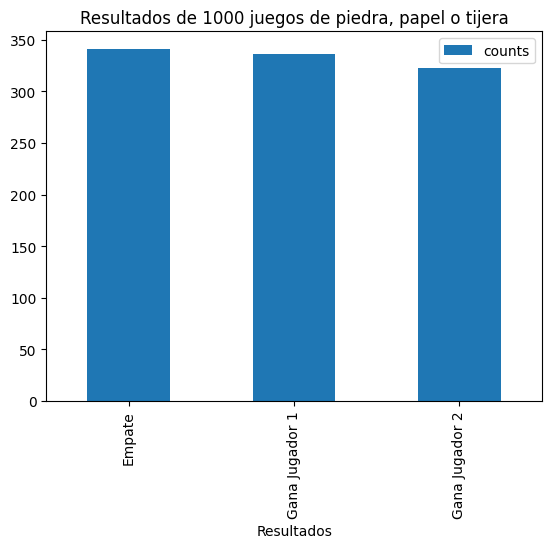

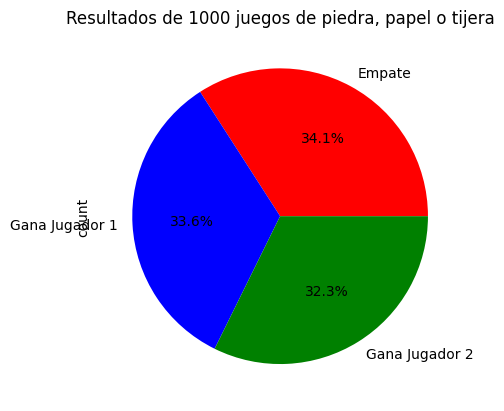

In [21]:
piedraPapelOTijera(1000)